# Logistic regression with micro:bit

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import cumulative_trapezoid

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
# Convert milligravities to m/s2
MG_TO_MS2 = 0.00980665

def process_data(data):
    # Clean the columns
    orig_columns = ["time (source1)", "x", "y", "z"]
    new_columns = ["t", "ax", "ay", "az"]
    data = data[orig_columns]
    data.columns = new_columns

    # Clean NaNs
    data = data.dropna()

    # Convert to m/s2
    for acc in ['ax', 'ay', 'az']:
        data[acc] = data[acc] * MG_TO_MS2

    # Replace outliers with the median
    for acc in ['ax', 'ay', 'az']:
        acc_raw = data[acc].copy()
        acc_raw[np.abs(acc_raw / np.median(acc_raw)) > 1.5] = np.median(acc_raw)
        data[acc] = acc_raw

    # Compute velocity
    data['vx'] = cumulative_trapezoid(data['ax'], data['t'], initial = 0)
    data['vy'] = cumulative_trapezoid(data['ay'], data['t'], initial = 0)
    data['vz'] = cumulative_trapezoid(data['az'], data['t'], initial = 0)

    # Compute position
    data['x'] = cumulative_trapezoid(data['vx'], data['t'], initial = 0)
    data['y'] = cumulative_trapezoid(data['vy'], data['t'], initial = 0)
    data['z'] = cumulative_trapezoid(data['vz'], data['t'], initial = 0)

    return data

1. Read and preprocess the dataset.

In [3]:
data = pd.read_csv("shake_data.csv", skiprows = 1, sep = '\t')
data = process_data(data)
data.head()

,t,ax,ay,az,vx,vy,vz,x,y,z
0,0.000,-0.627626,4.471832,-9.218251,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.021,-0.627626,4.471832,-9.218251,-0.013180,0.093908,-0.193583,-0.000138,0.000986,-0.002033
2,0.051,-0.627626,4.511059,-9.218251,-0.032009,0.228652,-0.470131,-0.000816,0.005824,-0.011988
3,0.068,-0.627626,4.511059,-9.218251,-0.042679,0.305340,-0.626841,-0.001451,0.010363,-0.021313
4,0.087,-0.627626,4.471832,-9.179024,-0.054603,0.390677,-0.801615,-0.002375,0.016976,-0.034883


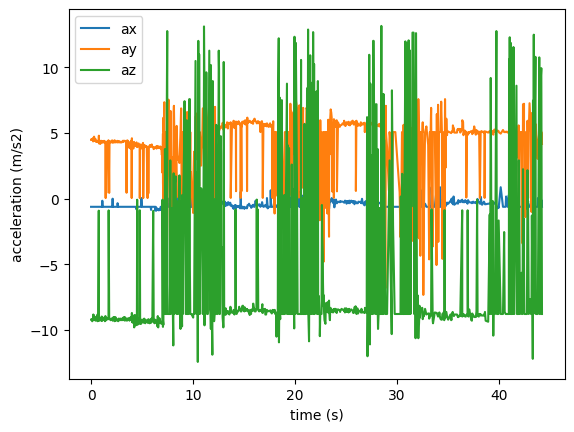

In [4]:
for acc in ['ax', 'ay', 'az']:
    plt.plot(data['t'], data[acc], label = acc)
plt.xlabel("time (s)")
plt.ylabel("acceleration (m/s2)")
plt.legend()

2. Pick a time period of clean data.

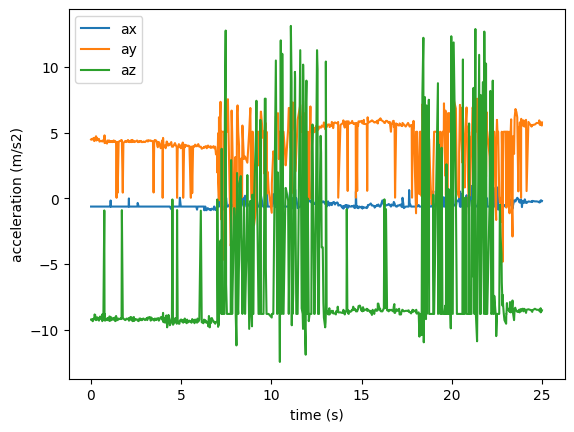

In [8]:
t_start = 0 # seconds
t_end = 25 # seconds

data = data[(data['t'] > t_start) & (data['t'] < t_end)]

for position in ['ax', 'ay', 'az']:
    plt.plot(data['t'], data[position], label = position)
plt.xlabel("time (s)")
plt.ylabel("acceleration (m/s2)")
plt.legend()

3. Split the data into train and test.

In [9]:
X_train = data.loc[data['t'] < 14, ['t', 'ax', 'ay', 'az']]
y_train = np.ones(len(X_train))
y_train[X_train['t'] < 7] = 0

X_test = data.loc[(data['t'] > 14) & (data['t'] < 24), ['t', 'ax', 'ay', 'az']]
y_test = np.ones(len(X_test))
y_test[X_test['t'] < 17] = 0

4. Train a logistic regression model
$$
\hat{p} = \sigma(b_0 + b_1 \times t + b_2 \times a_x + b_3 \times a_y + b_4 \times a_z)
$$

In [17]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
preds = lr.predict(X_test)

In [18]:
accuracy_score(y_test, preds)

0.7045454545454546

In [19]:
preds

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.